In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

In [3]:
data2 = pd.read_csv('bigData_cleaned2.csv', header=0, sep=',')
data2=data2.iloc[:,1:]

In [5]:
df_only_derbies = data2[data2['derby']==1]
df_only_not_derbies =  data2[data2['derby']==0]

<AxesSubplot:ylabel='derby'>

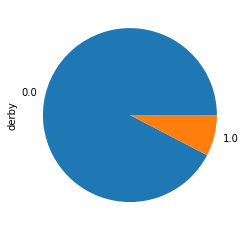

In [6]:
#Here we can see the ratio between number of games which are derbies in orange,
#And the not derbies games in blue, kind of like pacman shape
data2["derby"].value_counts().plot(kind='pie')

Here we can see the ratio between amount of games which belongs to derby section in orange color.
Against the other games which are not defined as derby games. you can see a shape of pacman here.
Why do we see such a big 'advantage' for the other games? Because most of the teams are not from the same city in England.
Surely there were many recently belongs to city like London which is the most common city in England that teams play at.
But still, many teams in this league came from many cities!

<AxesSubplot:xlabel='derby', ylabel='count'>

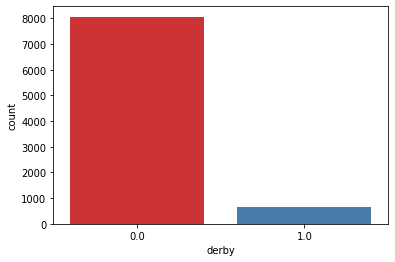

In [7]:
data2['derby'].value_counts()
sns.countplot(x='derby',data=data2,palette='Set1')

Same as above, just showing this in bars so we will see the ratio better in numbers and not only in shapes!

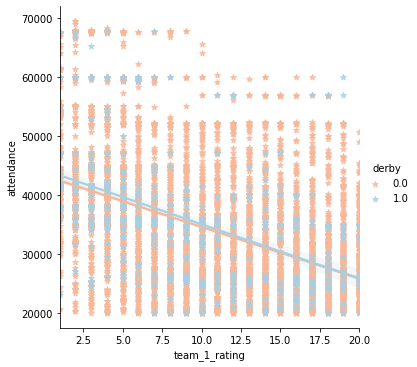

In [12]:
sns.lmplot(x='team_1_rating', y='attendance', hue='derby',palette="RdBu",markers='*', data=data2[(data2['attendance']<70000) & (data2['attendance']>20000)]) 

<AxesSubplot:xlabel='team_1_rating', ylabel='attendance'>

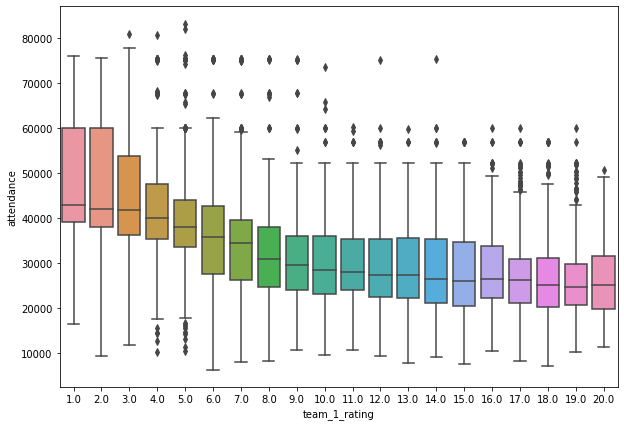

In [14]:
plt.figure(figsize=(10,7))

sns.boxplot(x='team_1_rating',y='attendance',data=data2)

We can see here through the box plot that the median of team_1_rating is 50,000 attendance.
We can also see that the highest attendance that appears on 25% above the box plot, the peak of attendance and we can see that
the team hosts could be third or even fifth on the table at the same time they host a game. And still have a peak of attendance.
This changes alot about what we did expect and what we did see actually.
It's intuitive to think that as much as the team is better the more people would want to come to see they play.
But in the Premier League not like in any other league, the old say is correct, football is saint!

<AxesSubplot:xlabel='occuper', ylabel='Density'>

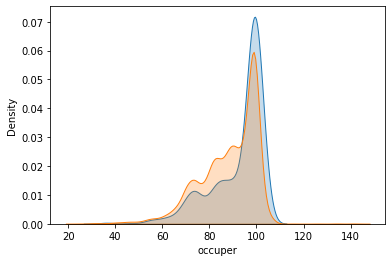

In [20]:
#the blue graph is all derby games, the orange is regular games
#we can excpect for the occuper in derby games to be higher
#because its central games witch is what happend here!
ax = sns.kdeplot(df_only_derbies.occuper, shade=True)
sns.kdeplot(df_only_not_derbies.occuper, shade=True)

The blue graph is including all derby games.
The orange graph is including all regular games.
We could expect for the attendance in derby games to be higher because they are actually the more dominantic games of the season.
We actually do see it here through the density plot here.

<AxesSubplot:>

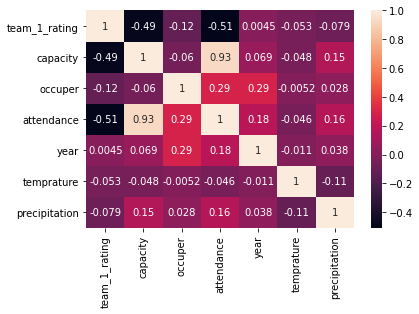

In [22]:
df_heat = pd.DataFrame(data2, columns = ['team_1_rating', 'capacity','occuper', 'attendance', 'year', 'temprature', 'city', 'precipitation'])
sns.heatmap(df_heat.corr(), annot=True)

Heatmap is here to show us the correlation between each column variables to other variables.
Our main idea was to find out correlation between features to our labeled variable - attendance.
But we did find out that actually there is no relation at all between temprature nor precipitation to attendance / city.
Which did was something we were actually looking forward because it did sound logically make sense.
Eventually we did find out massive relation between attendance to capacity!
We did find out a good correlation between team_1_rating to attendance which means that people like to see a game the better if the hosting team is leading the table.

In [23]:
def curr_mean(data2, rating):
    return (data2[data2['team_1_rating']==rating])['attendance'].mean()

In [24]:
list_of_rating_attend= list()
for rating in range(1,21):
    list_of_rating_attend.append(curr_mean(data2, rating))
num_lst = list(range(1, 21))

In [25]:
list_of_rating_attend
df_rating = pd.DataFrame(np.column_stack([list_of_rating_attend, num_lst]), 
                               columns=['attend mean', 'rating'])

In [26]:
data2[['attendance', 'year']].corr()
#data2[['attendance', 'capacity']].corr(method='spearman')

,attendance,year
attendance,1.000000,0.175186
year,0.175186,1.000000


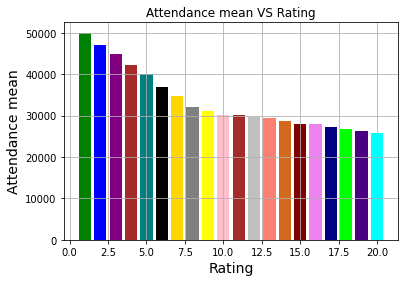

In [27]:
New_Colors = ['green','blue','purple','brown','teal','black', 'gold', 'grey', 'yellow', 'pink', 'brown', 'silver', 'salmon', 'chocolate',  'maroon', 'violet', 'navy', 'lime', 'indigo', 'cyan'] 
plt.bar(df_rating['rating'],df_rating['attend mean'], color = New_Colors)
plt.title('Attendance mean VS Rating')
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Attendance mean',fontsize=14)
plt.grid(True)
plt.show()

Here we did take every team_1_rating mean attendance and placed them on graph in y axis.
Against x axis which contains team_1_rating, we do see a very solid relation between the team's rating to the attendance.
Meaning that our suspicious by the heatmap were meaning something and we got onto a good relation!